In [1]:
%cd src

/mnt/workspace/src


In [2]:
from VLMPipline.VLM import VLM
import numpy as np
import cv2, torch
torch.set_grad_enabled(False)

# vlm config
owlv2_model_path = "/models/google-owlv2-large-patch14-finetuned"
owlv2_model_path = "/models/google-owlv2-base-patch16-ensemble"
sam_model_path = "/models/facebook-sam-vit-huge"
# sam_model_path = "/models/facebook-sam-vit-base"
xmem_model_path = "/models/XMem.pth"
resnet_18_path = "/models/resnet18.pth"
resnet_50_path = "/models/resnet50.pth"


picture = "../indoor.jpg"
pic = cv2.imread(picture).transpose(2, 0, 1)


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
Using GPU


In [3]:

vlmpipeline = VLM(
    owlv2_model_path,
    sam_model_path,
    xmem_model_path,
    resnet_18_path,
    resnet_50_path,
    verbose=True,
    resize_to=[640,640]
)
frame = vlmpipeline._resize_frame(pic, 640)

Hyperparameters read from the model weights: C^k=64, C^v=512, C^h=64
Single object mode: False


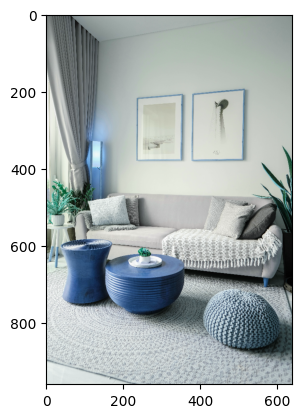

In [4]:
import matplotlib.pyplot as plt
plt.imshow(frame.transpose(1,2,0))

[VLM INFO|19:13:46] ##########Owlv2 Model START##########
total memory (in MB): 16160.5, reserved memory (in MB): 5308.0, allocated memory (in MB): 3379.6
[VLM INFO|19:13:46] Detect windows


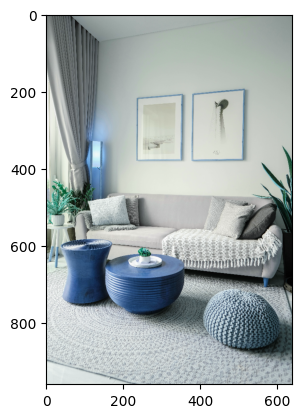

[VLM INFO|19:13:46] ##########Owlv2 Model END##########


([], [], [])

In [34]:
text = ["windows"]
vlmpipeline.owlv2_wrapper.predict(frame, text, 0.5, verbose=True, release_memory=True)